## Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Converged at cutoff = 50.0 Ry
Converged at cutoff = 60.0 Ry
Converged at cutoff = 70.0 Ry
Converged at cutoff = 80.0 Ry


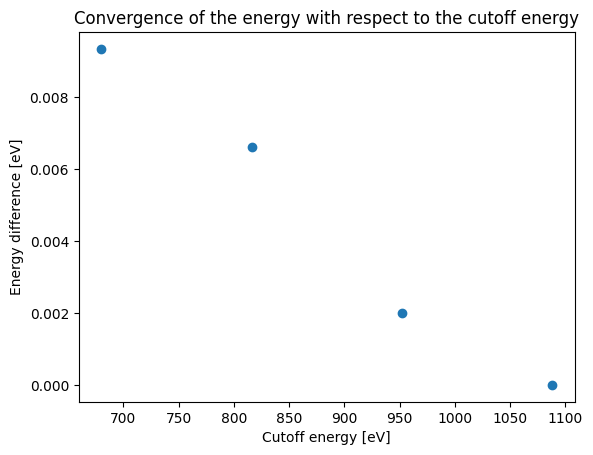

<Figure size 640x480 with 0 Axes>

In [5]:
E = np.array([-75.53725762,-75.53765998,-75.53833868,-75.53863059]) *13.6/2 #two atoms in the unit cell
E_cutoff = np.array([50,60,70,80])*13.6

T = 0.01 #eV

convergence = []
for cut,energy in zip(E_cutoff,E):
    diff = energy - E[-1]
    convergence.append(diff)
    if diff < T:
        print("Converged at cutoff = {} Ry".format(cut/13.6))
plt.figure()
plt.plot(E_cutoff,convergence,'o')
plt.xlabel('Cutoff energy [eV]')
plt.ylabel('Energy difference [eV]')
plt.title('Convergence of the energy with respect to the cutoff energy')
plt.show()
plt.savefig('convergence_ecutwfc.png',dpi=300)

Converged at cutoff = 400 
Converged at cutoff = 410 
Converged at cutoff = 420 
Converged at cutoff = 430 


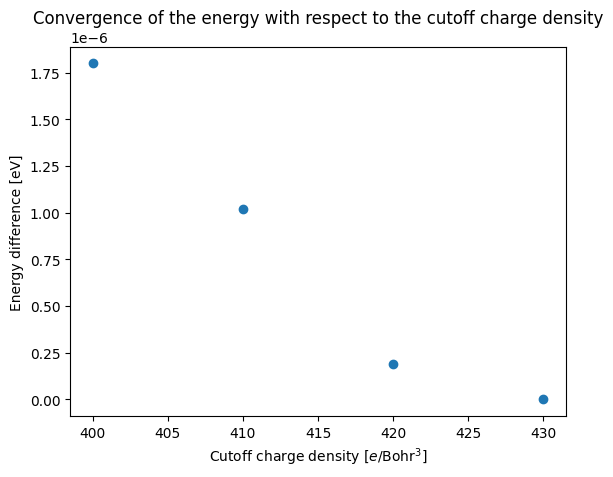

<Figure size 640x480 with 0 Axes>

In [7]:
rho_cutoff = np.array([400,410,420,430])
E_rho = np.array([-75.53725762,-75.53725840,-75.53725923,-75.53725942])

convergence = []
for cut,energy in zip(rho_cutoff,E_rho):
    diff = energy - E_rho[-1]
    convergence.append(diff)
    if diff < T:
        print("Converged at cutoff = {} ".format(cut))
plt.figure()
plt.plot(rho_cutoff,convergence,'o')
plt.xlabel('Cutoff charge density [$e$/Bohr$^3$]')
plt.ylabel('Energy difference [eV]')
plt.title('Convergence of the energy with respect to the cutoff charge density')
plt.show()
plt.savefig('convergence_rho.png',dpi=300)

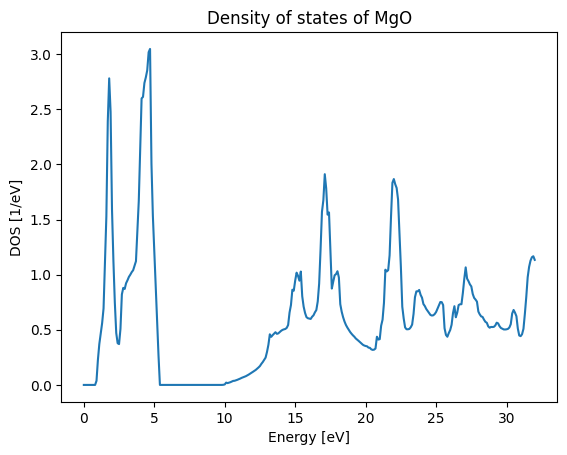

<Figure size 640x480 with 0 Axes>

In [9]:
data = np.loadtxt('MgO-dos.dat')
plt.figure()
plt.plot(data[:,0],data[:,1])
plt.xlabel('Energy [eV]')
plt.ylabel('DOS [1/eV]')
plt.title('Density of states of MgO')

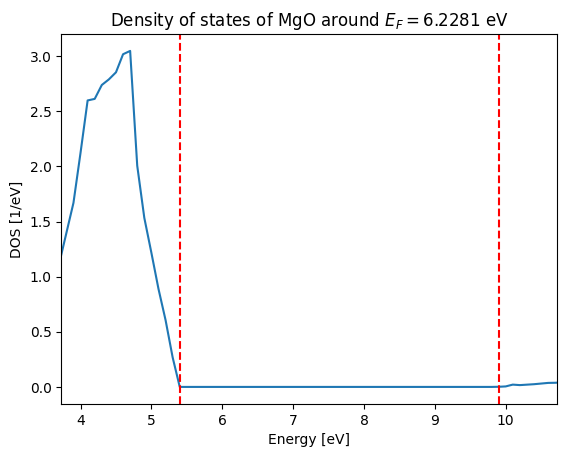

The band gap is 4.50 eV


In [29]:
# Plotting around the fermi energy of 6.2281 eV

# Find the index of the energy where the DOS is minimum
min_dos_index = np.argmin(data[:,1])

# Find the index of the energy where the DOS is maximum
max_dos_index = np.argmax(data[:,1])

plt.figure()
plt.plot(data[:,0],data[:,1])
plt.xlim(6.2281-2.5,6.2281+4.5)
plt.axvline(x=data[54,0], color='r', linestyle='--')
plt.axvline(x=data[99,0], color='r', linestyle='--')
plt.xlabel('Energy [eV]')
plt.ylabel('DOS [1/eV]')
plt.title('Density of states of MgO around $E_F= 6.2281$ eV')
plt.show()

print("The band gap is {:.2f} eV".format(data[99,0]-data[54,0]))

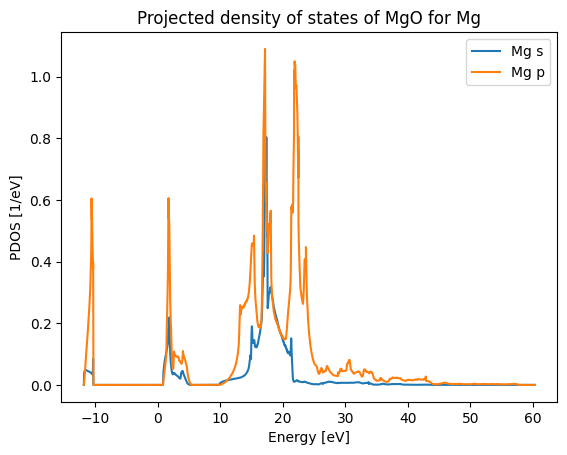

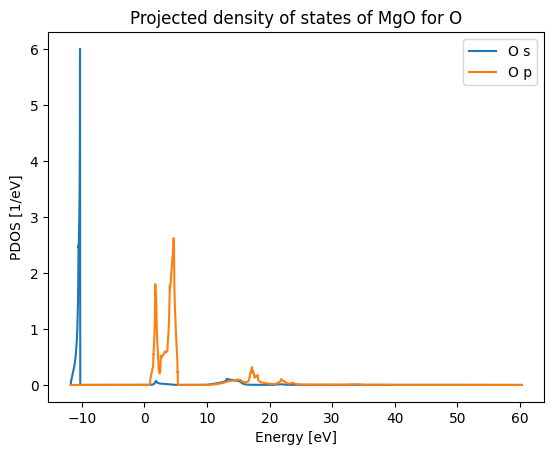

In [30]:
#Let's plot the PDOS of the Mg and O atoms

Mg_s = np.loadtxt('atom_Mg_s.dat')
Mg_p = np.loadtxt('atom_Mg_p.dat')
O_s = np.loadtxt('atom_O_s.dat')
O_p = np.loadtxt('atom_O_p.dat')

plt.figure()
plt.plot(Mg_s[:,0],Mg_s[:,1],label='Mg s')
plt.plot(Mg_p[:,0],Mg_p[:,1],label='Mg p')
plt.xlabel('Energy [eV]')
plt.ylabel('PDOS [1/eV]')
plt.title('Projected density of states of MgO for Mg')
plt.legend()

plt.figure()
plt.plot(O_s[:,0],O_s[:,1],label='O s')
plt.plot(O_p[:,0],O_p[:,1],label='O p')
plt.xlabel('Energy [eV]')
plt.ylabel('PDOS [1/eV]')
plt.title('Projected density of states of MgO for O')
plt.legend()

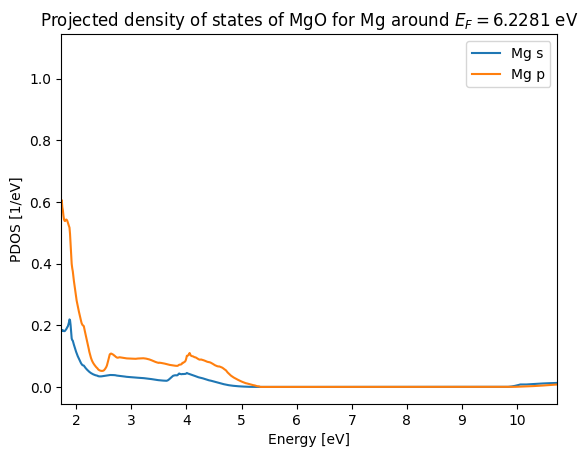

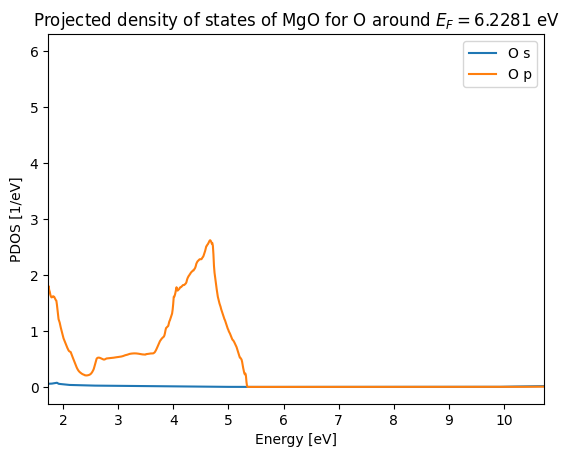

In [32]:
#Let's do the same but close to the Fermi energy
plt.figure()
plt.plot(Mg_s[:,0],Mg_s[:,1],label='Mg s')
plt.plot(Mg_p[:,0],Mg_p[:,1],label='Mg p')
plt.xlim(6.2281-4.5,6.2281+4.5)
plt.xlabel('Energy [eV]')
plt.ylabel('PDOS [1/eV]')
plt.title('Projected density of states of MgO for Mg around $E_F= 6.2281$ eV')
plt.legend()

plt.figure()
plt.plot(O_s[:,0],O_s[:,1],label='O s')
plt.plot(O_p[:,0],O_p[:,1],label='O p')
plt.xlim(6.2281-4.5,6.2281+4.5)
plt.xlabel('Energy [eV]')
plt.ylabel('PDOS [1/eV]')
plt.title('Projected density of states of MgO for O around $E_F= 6.2281$ eV')
plt.legend()

## Problem 2

[5.78449905 5.80340265 5.82230624 5.84120983 5.86011342 5.87901701
 5.8979206  5.9168242  5.93572779 5.95463138 5.97353497 5.99243856
 6.01134216 6.03024575 6.04914934 6.06805293 6.08695652 6.10586011
 6.12476371 6.1436673  6.16257089]


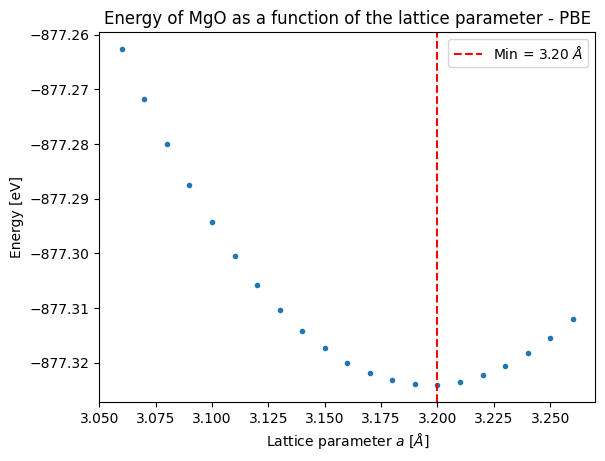

Min for a = 6.04914933837429


In [54]:
a = np.linspace(3.06,3.26,21)/0.529
c_exp = 12.30/0.529
E_2a_pbe = np.array([-387.0276179477,-387.0316708688,-387.0353191578,-387.0386125371,-387.0416190343,-387.0443074884,-387.0466948681,-387.0486648524,-387.0503618859,-387.0517873984,-387.0529532918,-387.0538048511,-387.0543648585,-387.0546775891,-387.0547275968,-387.0544650629,-387.0539326197,-387.0531819169,-387.0521679926,-387.0509102157,-387.0493764217])*13.6/6
print(a)
min_a_pbe = a[np.argmin(E_2a_pbe)]*0.529
plt.figure()
plt.plot(a*0.529,E_2a_pbe,'.')
plt.axvline(x=min_a_pbe, color='r', linestyle='--',label='Min = {:.2f} $\AA$'.format(min_a_pbe))
plt.xlabel('Lattice parameter $a$ [$\AA$]')
plt.ylabel('Energy [eV]')
plt.legend()
plt.title('Energy of MgO as a function of the lattice parameter - PBE')
plt.show()

print('Min for a = {}'.format(a[np.argmin(E_2a_pbe)]))

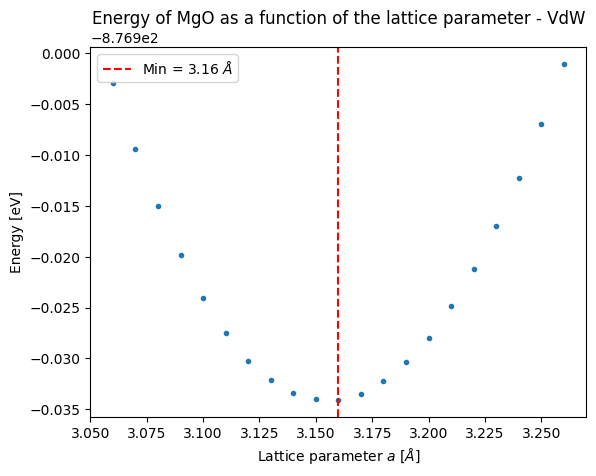

Min for a = 5.973534971644613


In [55]:
E_2a_vdw = np.array([-386.8689424668,-386.8718124889,-386.8742812817,-386.8763997701,-386.8782421139,-386.8797643870,-386.8809977187,-386.8818133964,-386.8823654289,-386.8826552570,-386.8826818239,-386.8824096609,-386.8818473575,-386.8810453617,-386.8799866191,-386.8786198064,-386.8769888117,-386.8751479984,-386.8730494008,-386.8707122042,-386.8681048606])*13.6/6
min_a_vdw = a[np.argmin(E_2a_vdw)]*0.529
plt.figure()
plt.plot(a*0.529,E_2a_vdw,'.')
plt.axvline(x=min_a_vdw, color='r', linestyle='--',label='Min = {:.2f} $\AA$'.format(min_a_vdw))
plt.xlabel('Lattice parameter $a$ [$\AA$]')
plt.ylabel('Energy [eV]')
plt.legend()
plt.title('Energy of MgO as a function of the lattice parameter - VdW')
plt.show()

print('Min for a = {}'.format(a[np.argmin(E_2a_vdw)]))

[26.46502836 26.65406427 26.84310019 27.03213611 27.22117202 27.41020794
 27.59924386 27.78827977 27.97731569 28.16635161 28.35538752 28.54442344
 28.73345936 28.92249527 29.11153119 29.30056711 29.48960302 29.67863894
 29.86767486 30.05671078 30.24574669]


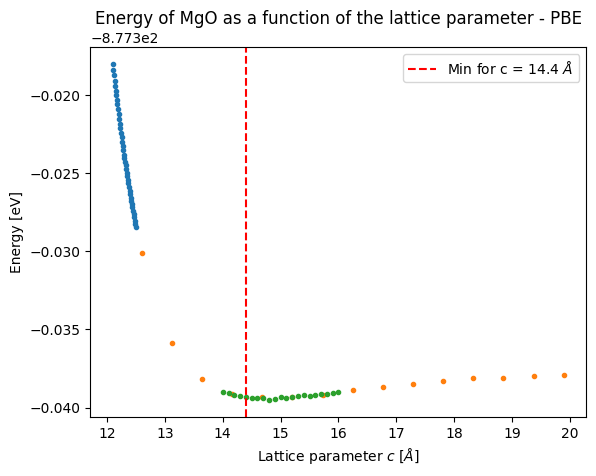

In [50]:
a_min = 6.04914933837429
c_1 = np.linspace(12.10,12.50,41)/0.529
c_2 = np.linspace(12.6,22.50,20)/0.529
c_3 = np.linspace(14.0,16.0,21)/0.529
print(c_3)
E_2c_pbe = np.array([-387.0520687606,-387.0522382097,-387.0523931391,-387.0525450876,-387.0526808513,-387.0528215873,-387.0529468851,-387.0530950166,-387.0532120409,-387.0533501741,-387.0534888287,-387.0536198265,-387.0537655648,-387.0538832846,-387.0540037873,-387.0541253821,-387.0542760823,-387.0543800361,-387.0545063810,-387.0546265303,-387.0547275971,-387.0548296646,-387.0549249108,-387.0550359782,-387.0551346784,-387.0552363720,-387.0553386079,-387.0554295781,-387.0555445734,-387.0556435884,-387.0557459062,-387.0558451059,-387.0559406916,-387.0560278430,-387.0561132732,-387.0562107803,-387.0562970056,-387.0563758958,-387.0564920536,-387.0565899595,-387.0566649247])*13.6/6
E_2c_pbe_2 = np.array([-387.0573997042,-387.0599428808,-387.0609496004,-387.0613686935,-387.0614756559,-387.0614655541,-387.0613992294,-387.0612789368,-387.0611731511,-387.0610953860,-387.0610147787,-387.0609377733,-387.0609367131,-387.0608697495,-387.0608538283]) * 13.6/6
E_2c_pbe_3 =np.array([-387.06133024,-387.06134879,-387.06140173,-387.06143036,-387.06145595,-387.06148781,-387.06149545,-387.06149303,-387.06154930,-387.06152757,-387.06147961,-387.06149631,-387.06146505,-387.06143393,-387.06142115,-387.06143422,-387.06139947,-387.06139141,-387.06137589,-387.06134732,-387.06131211])*13.6/6
min_c_3 = 0.529*c_3[np.argmin(E_2c_pbe_2)]
plt.figure()
plt.plot(c_1*0.529,E_2c_pbe,'.')
plt.plot(c_2[:15]*0.529,E_2c_pbe_2,'.')
plt.plot(c_3*0.529,E_2c_pbe_3,'.')
plt.axvline(x=min_c_3,color='r',linestyle='--',label='Min for c = {} $\AA$'.format(min_c_3))
plt.legend()
plt.xlabel('Lattice parameter $c$ [$\AA$]')
plt.ylabel('Energy [eV]')
plt.title('Energy of MgO as a function of the lattice parameter - PBE')
plt.show()

In [39]:
print('Min for c = {}'.format(0.529*c_3[np.argmin(E_2c_pbe_2)]))

Min for c = 14.4


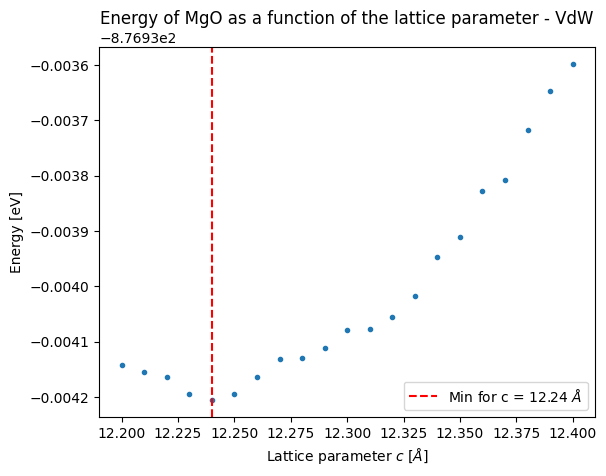

Min for c = 12.24


In [51]:
c_4 = np.linspace(12.20,12.40,21)/0.529
E_2c_vdw = np.array([-386.8827095488,-386.8827151583,-386.8827197537,-386.8827326391,-386.8827377167,-386.8827328094,-386.8827190678,-386.8827049453,-386.8827041378,-386.8826966967,-386.8826818239,-386.8826815206,-386.8826713765,-386.8826552407,-386.8826241178,-386.8826080909,-386.8825713537,-386.8825621463,-386.8825220940,-386.8824916069,-386.8824697704])*13.6/6
min_c_4 = c_4[np.argmin(E_2c_vdw)]*0.529
plt.figure()
plt.plot(c_4*0.529,E_2c_vdw,'.')
plt.axvline(x=min_c_4,color='r',linestyle='--',label='Min for c = {} $\AA$'.format(min_c_4))
plt.legend()
plt.xlabel('Lattice parameter $c$ [$\AA$]')
plt.ylabel('Energy [eV]')
plt.title('Energy of MgO as a function of the lattice parameter - VdW')
plt.show()

print('Min for c = {}'.format(0.529*c_4[np.argmin(E_2c_vdw)]))

## Problem 3

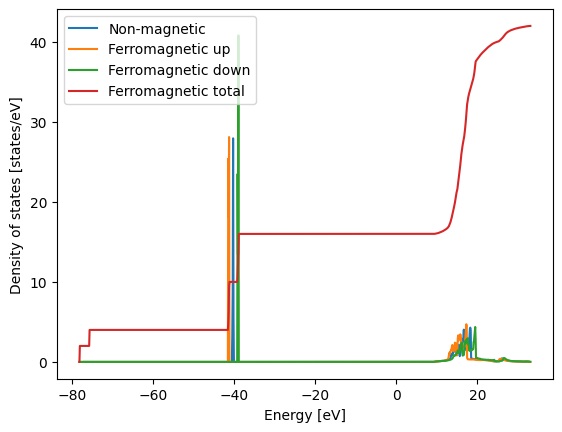

In [61]:
Co_nm = np.loadtxt('Co_hcp-nm.txt')
Co_fm = np.loadtxt('Co_hcp-fm.txt')

plt.figure()
plt.plot(Co_nm[:,0],Co_nm[:,1],label='Non-magnetic')
plt.plot(Co_fm[:,0],Co_fm[:,1],label='Ferromagnetic up')
plt.plot(Co_fm[:,0],Co_fm[:,2],label='Ferromagnetic down')
plt.plot(Co_fm[:,0],Co_fm[:,3],label='Ferromagnetic total')
plt.xlabel('Energy [eV]')
plt.ylabel('Density of states [states/eV]')
plt.legend()